<a href="https://colab.research.google.com/github/parth-gz/Data-Science/blob/main/17%20-%20Hypothesis%20Testing/hypothesis_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats

In [4]:
from statsmodels.stats import descriptivestats as sd
#provides descriptive statistics tools
from statsmodels.stats.weightstats import ztest
#Used for conducting z tests on datasets

### 1-sample sign test

In [5]:
# whenever there is a single sample and data is not normal
marks=pd.read_csv('Signtest.csv')
marks.head()

,Scores
0,60
1,75
2,90
3,99
4,98


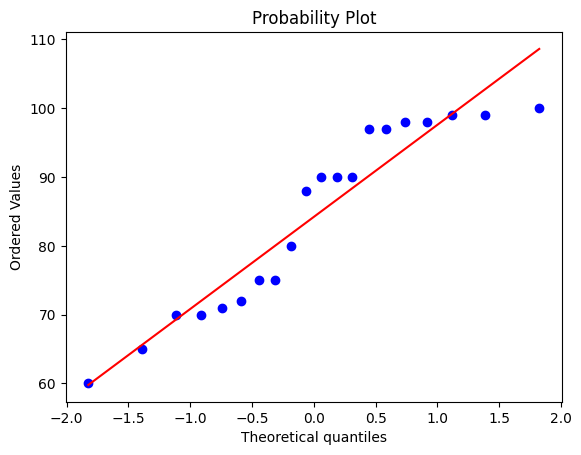

In [10]:
# Normal QQ plot
import pylab
stats.probplot(marks.Scores,dist='norm',plot=pylab)
#creates a QQ plot to visually check if the data follows a normal distribution
pylab.show()

In [13]:
#Test for normality
stats.shapiro(marks.Scores) #Outputs a test statistic and p-value
#performs the Shapiro-Wilk test for normality
#H0: The data is normally distributed
#H1: The data is not normally distributed

ShapiroResult(statistic=0.8875984049096806, pvalue=0.024299306804881928)

In [ ]:
#p value is 0.0242993068<0.05, data is not normal

In [14]:
#Descriptive statistics
print(marks.Scores.describe())

count     20.00000
mean      84.20000
std       13.33614
min       60.00000
25%       71.75000
50%       89.00000
75%       97.25000
max      100.00000
Name: Scores, dtype: float64


In [15]:
#mean=84.2 and median=89.00

In [16]:
#1 sample sign test
sign_test_results=sd.sign_test(marks.Scores, mu0=marks.Scores.mean())
print("Sign test results: ",sign_test_results)

Sign test results:  (1.0, 0.8238029479980469)


In [24]:
#p-value=0.824
#Interpretation
#H0: The median of scores is equal to the mean or scores
#H1: The median of scores is not equal to the mean or scores
#Since the p value is greater than 0.05, we fail to reject the null hypothesis
#Conclusion: The mean and median of the Scores are statistically similar
#but they are not similar as seen by Scores.decribe(), hence the test fails here

### 1-sample z-test

In [25]:
#Objective: Check if the fabric length is exactly 150 or different
fabric=pd.read_csv('Fabric_data.csv')
fabric.head()

,Fabric_length
0,151.2
1,160.3
2,147.5
3,149.2
4,159.2


In [20]:
#normality test
stats.shapiro(fabric)

ShapiroResult(statistic=0.9397524078584506, pvalue=0.1460935830606142)

In [21]:
#p-value is 0.146>0.05
fabric_mean=fabric.mean()
print(fabric_mean)

Fabric_length    155.064
dtype: float64


In [22]:
#Z-test
ztest_result, pvalue=ztest(fabric['Fabric_length'],value=150)
print("Z-test results: ",ztest_result,"\np-value: ",pvalue)

Z-test results:  4.488987748287781 
p-value:  7.156241255356764e-06


In [ ]:
#p-value is 7.156x10^-6<0.05
#reject the null hypothesis
#Hence
#H0:The mean of Fabric length is exactly 150
#H1:Fabric length not is ecavtly 150